In [ ]:
'''
### Note version requirement
* python: 3.9.12
'''
from platform import python_version

from IPython.display import Image
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import sklearn as sk
import pgmpy
import matplotlib.pyplot as plt
from sklearn.metrics import silhouette_score

print(f'python requirement: \t{python_version()}')
print(f'pgmpy requirement: \t{pgmpy.__version__}')
print(f'pandas requirement: \t{pd.__version__}')
print(f'numpy requirement: \t{np.__version__}')
print(f'scikit-learn requirement: \t{sk.__version__}')

python requirement: 	3.9.12
pgmpy requirement: 	0.1.18
pandas requirement: 	1.4.1
numpy requirement: 	1.20.3
scikit-learn requirement: 	1.0.2


### Q1 (15 points) 

#### This question is to be solved by hand.

Given the following learned Bayesian network structure explaining the relationships between variables in container shipping data:

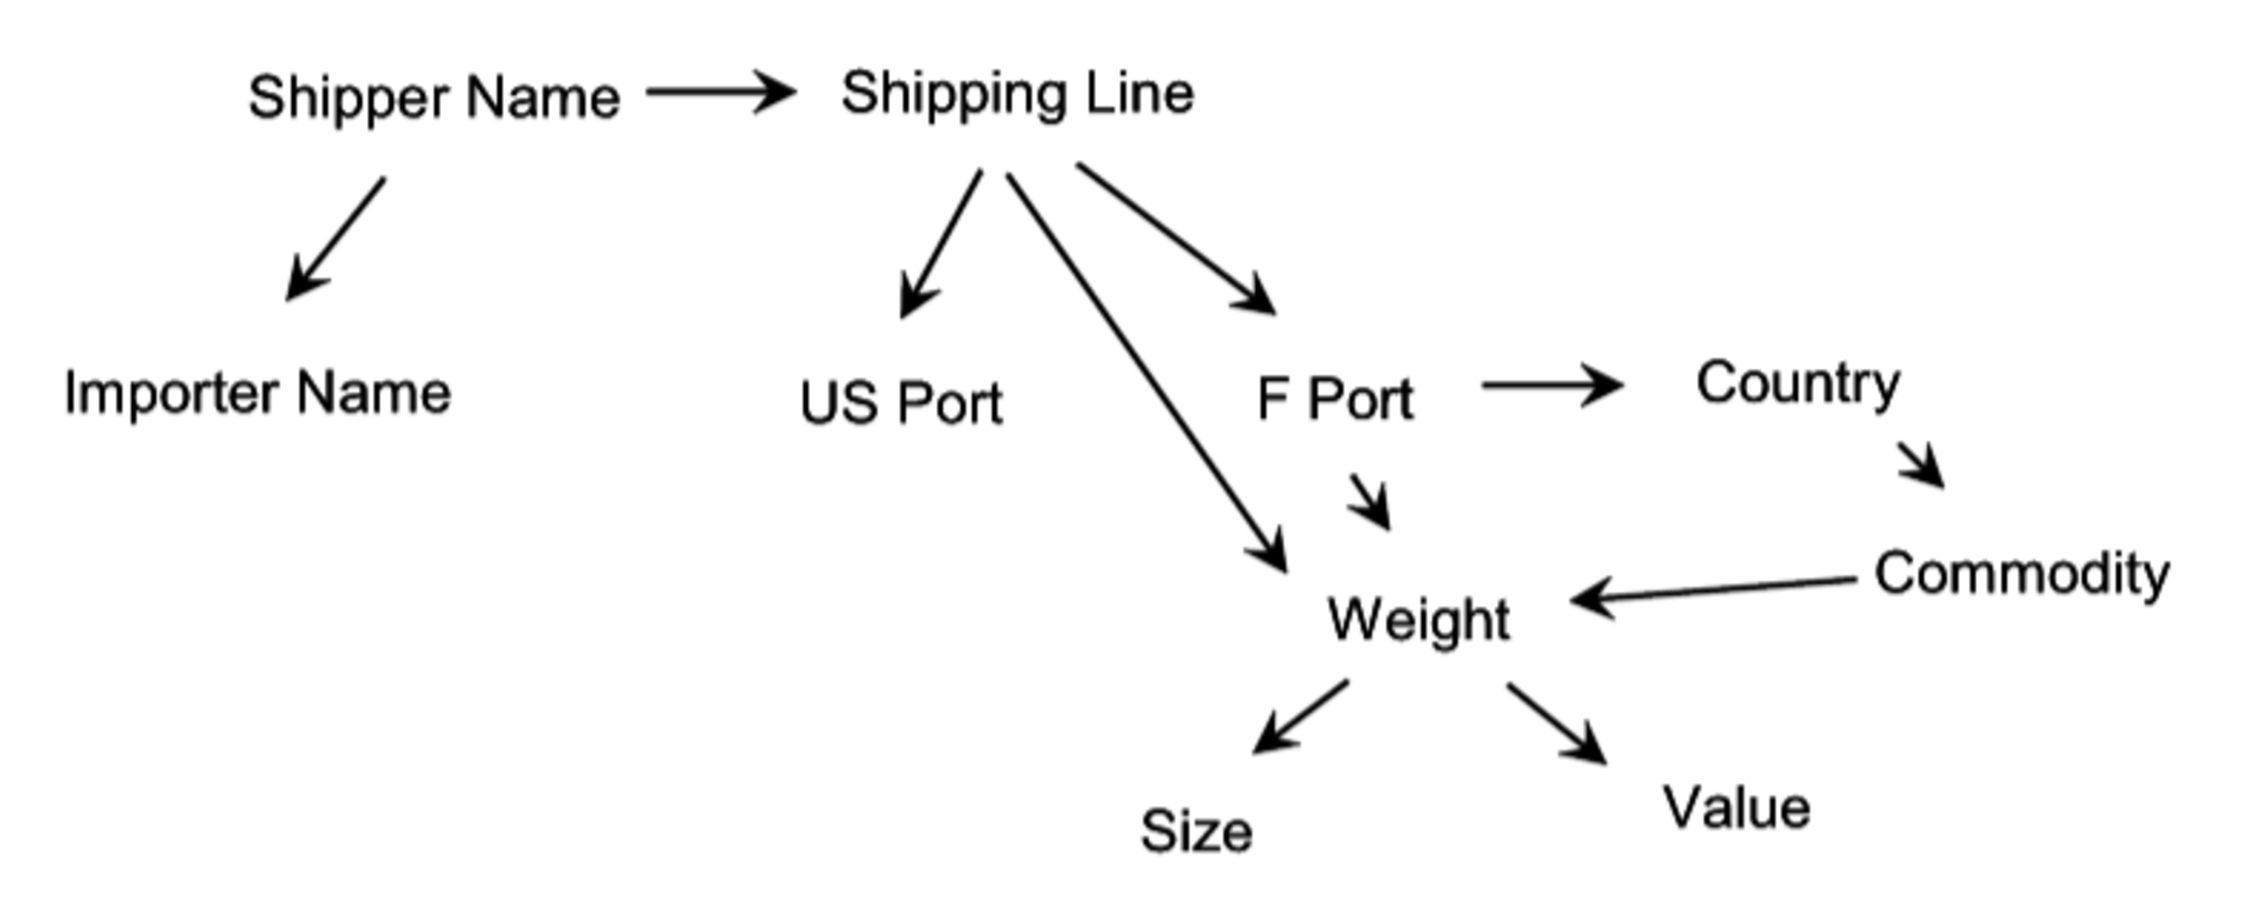

In [ ]:
Image('HW3Q1.png')

1) Which of the following conditional independence relationships hold? Choose “Independent” or “Dependent” for each (6 points):

CI (Shipper Name, Value | F Port)?  Independent

CI (Shipper Name, Value | Shipping Line)?  Independent

CI (Foreign Port, Commodity | Country)?  Independent

CI (Foreign Port, Commodity | County, Weight)?  Dependent

2) Now consider a smaller dataset with only four discrete attributes (Shipping Line, US Port, Foreign Port, Weight), and the following conditional probability distributions:

Shipping Line: CSCO (80%), ASCO (20%)

Foreign Port | Shipping Line = CSCO: Yokohama (40%), Vancouver (60%)

Foreign Port | Shipping Line = ASCO: Vancouver (100%)

US Port | Shipping Line = ASCO: Seattle (100%)

US Port | Shipping Line = CSCO: Seattle (20%), Los Angeles (80%)

Weight | Shipping Line = CSCO, Foreign Port = Vancouver: Light (30%), Medium (20%), Heavy (50%)

Weight | Shipping Line = CSCO, Foreign Port = Yokohama: Light (10%), Medium (60%), Heavy (30%)

Weight | Shipping Line = ASCO, Foreign Port = Vancouver: Light (15%), Medium (15%), Heavy (70%)

Which of the following packages is most anomalous?

a) A heavy package shipped from Vancouver to Seattle by ASCO

b) A heavy package shipped from Vancouver to Seattle by CSCO

c) A heavy package shipped from Yokohama to Los Angeles by CSCO

To answer this question, compute the likelihood of each package given the Bayesian Network (lowest likelihood = most anomalous). You must show your calculations to receive credit. (9 points)

(Your answers here, including all calculations)

In [ ]:
# a) P(Heavy, FP=Van, US=Sea, ASCO) = P(ASCO) * P(Heavy|ASCO, Van) * P(Van|FP=Van) * P(Sea|US=Sea) = 0.2* 0.7 * 1 * 0.6 = 0.084
# b) P(Heavy, FP=Van, US=Sea, CSCO) = P(CSCO) * P(Heavy|CSCO, Van) * P(Van|FP=Van) * P(Sea|US=Sea) = 0.8 * 0.6 * 0.2 * 0.5 = 0.048
# c) P(Heavy, FP=Yoko, US=LA, CSCO) = P(CSCO) * P(Heavy|CSCO, Yoko) * P(Yoko|FP=Yoko) * P(LA|US=LA) = 0.8 * 0.3 * 0.4 * 0.8 = 0.0768

# Based on the results, the b) A heavy package shipped from Vancouver to Seattle by CSCO is most anomalous.

### Q2. Bayesian Network Learning (35 points)

In this question, we use dataset: "HW3Q2.csv" for Bayesian Network Learning.

In [ ]:
# from sklearn.model_selection import train_test_split
data2=pd.read_csv("HW3Q2.csv")
train,test=train_test_split(data2,random_state=9,test_size=0.4)
data2.head()

,A,B,C,D,E,F
0,1,0,0,0,1,1
1,0,0,0,1,0,1
2,1,1,0,1,1,1
3,1,0,0,1,1,1
4,2,0,1,0,1,1


In [ ]:
# import sklearn as sk
print(sk.__version__)

1.0.2


a) Use the training data to select the best structure you want to use for Bayesian Network Learning. Please use Hill Climbing with BIC score metric. (10 points)

b) Use the Bayesian Estimator to estimate the CPDs for your model and visualize the network with CPDs. (15 points)

c) Use the model to predict "A" for the testing dataset. Report the out-of-sample prediction accuracy. (10 points)   

In [ ]:
# your answers here
from pgmpy.estimators import BicScore
# from pgmpy.models import BayesianModel
from pgmpy.models import BayesianNetwork
from pgmpy.estimators import ExhaustiveSearch
from pgmpy.estimators import HillClimbSearch


bic = BicScore(train)
hc = HillClimbSearch(train, state_names=bic)
best_model = BayesianNetwork(hc.estimate().edges()) # convert DAG to BayesianModel
print(best_model.edges())

C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
C:\ProgramData\Anaconda3\lib\site-packages\statsmodels\tsa\base\tsa_model.py:7: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


  0%|          | 0/1000000 [00:00<?, ?it/s]

[('A', 'D'), ('A', 'B'), ('A', 'E'), ('D', 'B'), ('D', 'E'), ('B', 'E')]


In [ ]:
from pgmpy.estimators import BayesianEstimator

best_model.fit(train, estimator=BayesianEstimator, state_names='bic')
for cpd in best_model.get_cpds():
    print("CPD of {variable}:".format(variable=cpd.variable))
    print(cpd)
for thenode in best_model.nodes():
    print(best_model.local_independencies(thenode))

CPD of A:
+------+-----------+
| A(0) | 0.321774  |
+------+-----------+
| A(1) | 0.363739  |
+------+-----------+
| A(2) | 0.252165  |
+------+-----------+
| A(3) | 0.0623231 |
+------+-----------+
CPD of D:
+------+---------------------+--------------------+---------------------+-----------------------+
| A    | A(0)                | A(1)               | A(2)                | A(3)                  |
+------+---------------------+--------------------+---------------------+-----------------------+
| D(0) | 0.18818734635787296 | 0.4929037427034451 | 0.7585438335809807  | 0.9983299933199733    |
+------+---------------------+--------------------+---------------------+-----------------------+
| D(1) | 0.8118126536421271  | 0.5070962572965548 | 0.24145616641901932 | 0.0016700066800267202 |
+------+---------------------+--------------------+---------------------+-----------------------+
CPD of B:
+------+-----------------------+--------------------+-----+-----------------------+------------

In [ ]:
print(best_model.nodes)

['A', 'D', 'B', 'E']


In [ ]:
train_x = train.loc[:,"D":"E"]
predicted_train = best_model.predict(train_x)
print("In sample:",(train.loc[:,'A'].reset_index(drop=True)==predicted_train['A']).mean())

test_x = test.loc[:,"D":"E"]
predicted_test = best_model.predict(test_x)
print("Out of sample:",(test.loc[:,'A'].reset_index(drop=True)==predicted_test['A']).mean())

  0%|          | 0/4 [00:00<?, ?it/s]

In sample: 0.45266666666666666


C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


  0%|          | 0/4 [00:00<?, ?it/s]

Out of sample: 0.439


C:\ProgramData\Anaconda3\lib\site-packages\pgmpy\models\BayesianNetwork.py:747: FutureWarning: Passing a set as an indexer is deprecated and will raise in a future version. Use a list instead.
  return data.merge(data_with_results, how="left").loc[:, missing_variables]


### Q3. Clustering: Spatial and Temporal Distributions of Chicago Crimes (50 points)

In this question you will use k-means and Gaussian mixture clustering in sklearn and hierarchical clustering in scipy to answer the question, “Do different types of crime display different trends over space and time?”  The dataset “HW3Q3_1.csv” consists of data for 119 different types of crime, each of which occurred at least 100 times in Chicago during the year 2016.  For each crime type, we have various features representing the spatial and temporal distribution of crime, including:

- The proportion of all crimes of that type that occurred on each day of the week (day_Sun, day_Mon, …, day_Sat).

- The proportion of all crimes of that type that occurred on each hour of the day (hour_0 = midnight to 12:59am, hour_1 = 1am to 1:59am, …, hour_23 = 11pm to 11:59pm).

- The proportion of all crime of that type that occurred in each of the 77 community areas of Chicago (community_area_1 … community_area_77).

We also have, for each crime type, its categorization by the FBI:

- Category = “P1V” corresponds to Part 1 Violent Crime, i.e., serious violent crimes

- Category = “P1P” corresponds to Part 1 Property Crime, i.e., serious property crimes

- Category = “P2” corresponds to Part 2 (less serious) crimes.

To answer parts a through f, you should cluster the 119 crime types using k-means into k = 3 clusters using only the hour of day (hour_0..hour_23) attributes.

a) Copy each cluster’s mean values for hour_0…hour_23 into a DataFrame and create a line graph to visualize these values by cluster.  (5 pts)

b) Describe the three different hour-of-day trends represented by these three clusters (5 pts).

c) Do you notice any consistent trends about which crime types are assigned to which cluster?  Note that by a "crime type", we are referring to specific crimes such as "narcotics" or "assault", not the FBI categories. (5 pts)  

d) Do the three clusters have different day-of-week trends?  Again, visualize the trends for each cluster by creating a line graph and discuss any notable differences.  (5 pts)

e) Do the three clusters affect different types of communities/neighborhoods?  To answer this question, you could first compute the proportions of "cluster 1", "cluster 2", and "cluster 3" crimes for each community area, and identify particular community areas with disproportionate amounts of a given cluster.  You can then use the provided file (HW3Q3_2.csv), to determine whether these community areas have any notable common characteristics (poverty, overcrowding, etc.).  You may also wish to consult the Chicago Community Areas map at https://en.wikipedia.org/wiki/Community_areas_in_Chicago. (5 pts)

f) How well do the three groups formed by clustering hour-of-day trends correspond to the FBI’s division between P1V, P1P, and P2 crimes? (5 pts)

g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)


In [ ]:
data3=pd.read_csv("HW3Q3_1.csv")
data3.head()

,crime_type,Category,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat,hour_0,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,ARSON: BY FIRE,P1P,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972,0.073654,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,P2,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185,0.055556,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,ASSAULT: AGGRAVATED: HANDGUN,P1V,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776,0.040630,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,P1V,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000,0.034000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,ASSAULT: AGGRAVATED: OTHER FIREARM,P1V,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [ ]:
data4=pd.read_csv("HW3Q3_2.csv")
data4.head()

,Community Area Number,COMMUNITY AREA NAME,centroid_x,centroid_y,PERCENT OF HOUSING CROWDED,PERCENT HOUSEHOLDS BELOW POVERTY,PERCENT AGED 16+ UNEMPLOYED,PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA,PERCENT AGED UNDER 18 OR OVER 64,PER CAPITA INCOME,PERCENT OF HOUSING UNITS VACANT,NUM_CRIMES_2016
0,1,Rogers Park,1164399.219,1947666.815,7.7,23.6,8.7,18.2,27.5,23939,11.870556,3420
1,2,West Ridge,1158307.200,1943243.722,7.8,17.2,8.8,20.8,38.5,23040,9.870385,3068
2,3,Uptown,1168228.082,1930980.022,3.8,24.0,8.9,11.8,22.2,35787,8.672137,3330
3,4,Lincoln Square,1159618.804,1933105.743,3.4,10.9,8.2,13.4,25.5,37524,8.600422,1859
4,5,North Center,1161104.228,1924056.010,0.3,7.5,5.2,4.5,26.2,57123,10.100636,1280


In [ ]:
# your answers here
from matplotlib import pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage  # for hierarchical clustering
from sklearn.cluster import KMeans

In [ ]:
data3.columns

Index(['crime_type', 'Category', 'day_Sun', 'day_Mon', 'day_Tue', 'day_Wed',
       'day_Thu', 'day_Fri', 'day_Sat', 'hour_0',
       ...
       'community_area_68', 'community_area_69', 'community_area_70',
       'community_area_71', 'community_area_72', 'community_area_73',
       'community_area_74', 'community_area_75', 'community_area_76',
       'community_area_77'],
      dtype='object', length=110)

In [ ]:
data3_ = data3.loc[:,'hour_0': 'hour_23']
data3_.head()

,hour_0,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,hour_9,...,hour_14,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23
0,0.073654,0.079320,0.076487,0.087819,0.082153,0.073654,0.039660,0.033994,0.014164,0.016997,...,0.019830,0.019830,0.025496,0.022663,0.022663,0.053824,0.033994,0.033994,0.042493,0.062323
1,0.055556,0.070370,0.033333,0.014815,0.025926,0.003704,0.007407,0.014815,0.018519,0.029630,...,0.055556,0.077778,0.048148,0.059259,0.044444,0.044444,0.077778,0.044444,0.074074,0.044444
2,0.040630,0.039580,0.033275,0.036778,0.018564,0.014011,0.012609,0.021366,0.025569,0.034676,...,0.055342,0.052189,0.059895,0.056392,0.062347,0.051839,0.053240,0.066550,0.055692,0.056042
3,0.034000,0.026000,0.018000,0.009000,0.010000,0.015000,0.020000,0.017000,0.033000,0.036000,...,0.045000,0.058000,0.073000,0.078000,0.068000,0.066000,0.059000,0.038000,0.051000,0.041000
4,0.009804,0.009804,0.029412,0.009804,0.009804,0.019608,0.039216,0.019608,0.000000,0.029412,...,0.029412,0.009804,0.107843,0.117647,0.058824,0.068627,0.078431,0.068627,0.049020,0.088235


In [ ]:
km = KMeans(n_clusters=3)
res=km.fit(data3_)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)


Cluster assignments: [0 0 0 1 0 0 2 1 0 1 0 0 0 0 1 0 0 0 0 2 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 0 2
 2 2 1 1 2 2 2 2 2 0 1 1 0 1 0 0 0 0 0 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1 1 1 0
 1 1 1 1 1 1 2 1 1 1 0 1 1 2 1 1 1 1 0 2 1 0 0 0 0 0 0 0 0 0 0 0 1 0 1 1 1
 1 1 1 1 0 0 0 1]

Cluster centers:
 [[0.05840987 0.04580745 0.04181406 0.03534788 0.0278477  0.01976771
  0.01897923 0.02140953 0.02360549 0.02854409 0.03257074 0.03249082
  0.03767692 0.03605063 0.03884339 0.04298892 0.04798357 0.05008376
  0.05430729 0.05686858 0.06361811 0.06098036 0.06691756 0.05708634]
 [0.03061337 0.01950498 0.01475302 0.01095523 0.00890795 0.00797363
  0.01187982 0.02081174 0.0298491  0.04022295 0.0564243  0.06590235
  0.06126449 0.0556566  0.0581785  0.05582088 0.05392813 0.05609529
  0.06881789 0.0769488  0.06216223 0.05269899 0.0460705  0.03455926]
 [0.05563878 0.00805128 0.0072664  0.00583933 0.00772808 0.00567655
  0.01240302 0.02160172 0.05628499 0.13194288 0.09270737 0.06097824
  0.11056231 0.06977804 0.06070717 

In [ ]:
q3_a = res.cluster_centers_

In [ ]:
df3 = pd.DataFrame(q3_a)
df3 = df3.T
col = ['cluster1','cluster2','cluster3']
df3.columns = col
df3

,cluster1,cluster2,cluster3
0,0.058410,0.030613,0.055639
1,0.045807,0.019505,0.008051
2,0.041814,0.014753,0.007266
3,0.035348,0.010955,0.005839
4,0.027848,0.008908,0.007728
5,0.019768,0.007974,0.005677
6,0.018979,0.011880,0.012403
7,0.021410,0.020812,0.021602
8,0.023605,0.029849,0.056285
9,0.028544,0.040223,0.131943


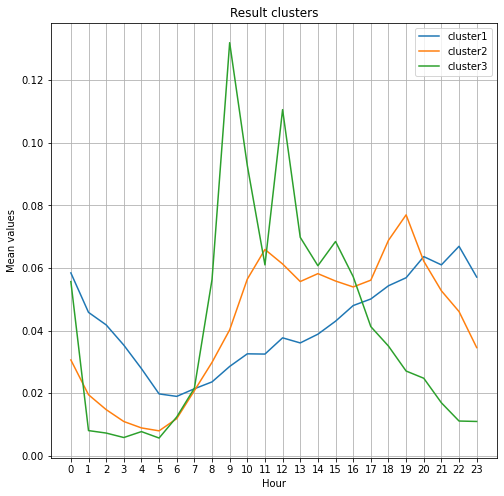

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
xticks = np.arange(len(df3))
ax.plot(df3,label=col)
ax.set(xticks=xticks,xticklabels=xticks,xlabel='Hour',
       ylabel='Mean values',
       title='Result clusters')
ax.legend()
ax.grid()

b) Describe the three different hour-of-day trends represented by these three clusters

In the cluster1, the crime rate increase from 5am to 9am, arriving the peak at 9am, then it decrease for 2 hours and arrive the second peak at 12pm. During 12pm to 11pm, it continue decreasing.

In the cluster2, the lowest point is at 6am, from 6am to 10pm, the crime rate keeps increasing, the highest point in one day is at 10pm. From 10pm to 6am, it continues decreasing.

In the cluster3, the crime rate increase from 5am to 11am, the fluctuation is in a steady state during 11am to 7pm, arriving peak at 7pm. During 7pm to 5am, it continue decreasing. 

Comparing these clusters, cluster1 is the most fluctuating and it got the highest peak among three clusters. Cluster2 got the most simple trend, the crime rate increases during the daytime, decreases during the nighttime. 

In [ ]:
part_b = pd.DataFrame([data3['crime_type'],res.labels_]).T.rename(columns={0:'crime_type','Unnamed 0':'cluster'})
part_b

,crime_type,cluster
0,ARSON: BY FIRE,0
1,ASSAULT: AGG PO HANDS NO/MIN INJURY,0
2,ASSAULT: AGGRAVATED: HANDGUN,0
3,ASSAULT: AGGRAVATED: OTHER DANG WEAPON,1
4,ASSAULT: AGGRAVATED: OTHER FIREARM,0
...,...,...
114,THEFT: RETAIL THEFT,1
115,WEAPONS VIOLATION: RECKLESS FIREARM DISCHARGE,0
116,WEAPONS VIOLATION: UNLAWFUL POSS OF HANDGUN,0
117,WEAPONS VIOLATION: UNLAWFUL USE HANDGUN,0


In [ ]:
data3_c = data3.loc[:,'day_Sun': 'day_Sat']
data3_c.head()

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275


In [ ]:
km = KMeans(n_clusters=3)
res=km.fit(data3_c)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)

Cluster assignments: [2 2 2 0 2 0 1 0 2 0 2 2 2 2 2 2 2 2 2 1 2 0 0 0 0 0 2 0 0 2 1 2 0 0 0 0 1
 1 1 2 0 1 1 1 1 2 2 0 0 2 0 2 2 2 0 2 0 0 1 0 0 0 0 0 2 0 0 0 1 0 0 2 0 0
 2 0 0 0 1 0 0 1 0 0 2 0 0 2 1 0 0 0 1 1 0 0 2 0 0 2 0 0 0 2 1 0 0 0 0 0 0
 0 2 0 0 2 0 2 0]

Cluster centers:
 [[0.12787315 0.1518209  0.1482153  0.14172633 0.14508742 0.14964459
  0.1356323 ]
 [0.07215597 0.14228653 0.175196   0.17506321 0.16474889 0.17215722
  0.09839219]
 [0.16893455 0.12760979 0.12715273 0.1260903  0.12715217 0.14988453
  0.17317591]]

Sum of squared errors: 0.4410816468704288


In [ ]:
q3_c = res.cluster_centers_

In [ ]:
df3_c = pd.DataFrame(q3_c)
df3_C = df3_c.T
col = ['cluster1','cluster2','cluster3']
df3_C.columns = col
df3_C

,cluster1,cluster2,cluster3
0,0.127873,0.072156,0.168935
1,0.151821,0.142287,0.127610
2,0.148215,0.175196,0.127153
3,0.141726,0.175063,0.126090
4,0.145087,0.164749,0.127152
5,0.149645,0.172157,0.149885
6,0.135632,0.098392,0.173176


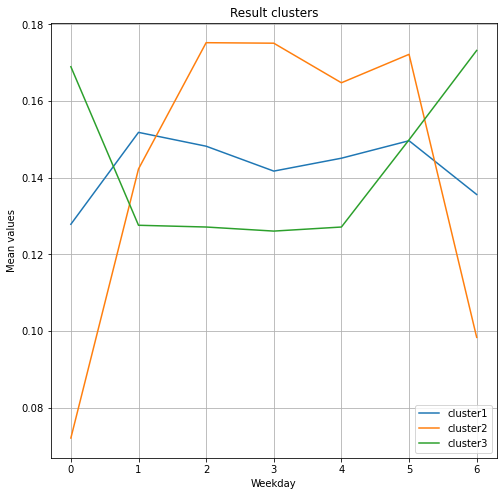

In [ ]:
fig, ax = plt.subplots(figsize=(8,8))
xticks = np.arange(len(df3_C))
ax.plot(df3_C,label=col)
ax.set(xticks=xticks,xticklabels=xticks,xlabel='Weekday',
       ylabel='Mean values',
       title='Result clusters')
ax.legend()
ax.grid()

In [ ]:
data3_d = data3.loc[:,'community_area_1': 'community_area_77']
data3_d.head()

,community_area_1,community_area_2,community_area_3,community_area_4,community_area_5,community_area_6,community_area_7,community_area_8,community_area_9,community_area_10,...,community_area_68,community_area_69,community_area_70,community_area_71,community_area_72,community_area_73,community_area_74,community_area_75,community_area_76,community_area_77
0,0.005666,0.008499,0.002833,0.000000,0.000000,0.005666,0.011331,0.002833,0.000,0.000000,...,0.019830,0.016997,0.019830,0.022663,0.005666,0.000000,0.002833,0.005666,0.000000,0.002833
1,0.014815,0.011111,0.014815,0.003704,0.003704,0.018519,0.003704,0.011111,0.000,0.007407,...,0.037037,0.048148,0.018519,0.025926,0.003704,0.003704,0.003704,0.011111,0.011111,0.007407
2,0.009107,0.009457,0.006655,0.003152,0.002102,0.003152,0.001751,0.010158,0.000,0.002102,...,0.035377,0.031524,0.013310,0.042732,0.002102,0.017863,0.000000,0.012259,0.002102,0.003152
3,0.014000,0.011000,0.014000,0.003000,0.006000,0.012000,0.004000,0.021000,0.001,0.002000,...,0.028000,0.030000,0.014000,0.037000,0.003000,0.010000,0.002000,0.002000,0.003000,0.006000
4,0.000000,0.009804,0.000000,0.009804,0.009804,0.019608,0.000000,0.000000,0.000,0.009804,...,0.029412,0.019608,0.009804,0.019608,0.000000,0.000000,0.000000,0.009804,0.000000,0.000000


In [ ]:
km = KMeans(n_clusters=3)
res=km.fit(data3_d)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)

Cluster assignments: [1 1 1 1 1 1 1 1 1 0 0 1 1 1 0 1 1 1 1 0 0 0 1 1 0 1 0 0 1 1 0 0 0 1 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 1 1 1 1 0 1 1 1 1 2 1 1 1 1 1 1 1 1 1 2 1 1 2 1 1 1
 1 1 1 1 1 0 0 1 0 1 1 1 1 1 1 1 1 1 2 0 1 0 1 1 0 0 1 0 0 1 1 0 0 0 0 0 0
 0 0 0 0 1 1 1 1]

Cluster centers:
 [[1.74912748e-02 1.59573882e-02 1.80437453e-02 1.08875456e-02
  7.45951085e-03 3.38844270e-02 2.02771529e-02 6.10208747e-02
  1.54699011e-03 6.69093959e-03 5.32076135e-03 2.33797817e-03
  3.80992457e-03 1.04942600e-02 1.21294391e-02 1.18958073e-02
  7.54511533e-03 2.12412270e-03 1.76476147e-02 6.57692015e-03
  8.65322389e-03 2.08960777e-02 2.14788607e-02 3.41829870e-02
  4.28209238e-02 1.53458826e-02 1.34842451e-02 4.32424795e-02
  2.43792166e-02 1.69479618e-02 8.99534859e-03 5.35281633e-02
  1.02865676e-02 6.78032022e-03 1.19462558e-02 1.78331852e-03
  3.29318446e-03 1.11840316e-02 4.96706585e-03 8.25672807e-03
  7.92953826e-03 1.38686469e-02 2.26098634e-02 2.09364323e-02
  3.93182028e-03 1.37098618e-02 1.0

In [ ]:
df3_d = pd.DataFrame(res.cluster_centers_)
df3_D = df3_d.T
col = ['cluster1','cluster2','cluster3']
df3_D.columns = col
df3_D

,cluster1,cluster2,cluster3
0,0.017491,0.010350,0.007551
1,0.015957,0.009476,0.001729
2,0.018044,0.010427,0.002579
3,0.010888,0.005051,0.000000
4,0.007460,0.002482,0.000000
...,...,...,...
72,0.009346,0.012751,0.001377
73,0.002599,0.001738,0.000000
74,0.007975,0.007879,0.000000
75,0.012485,0.005922,0.000000


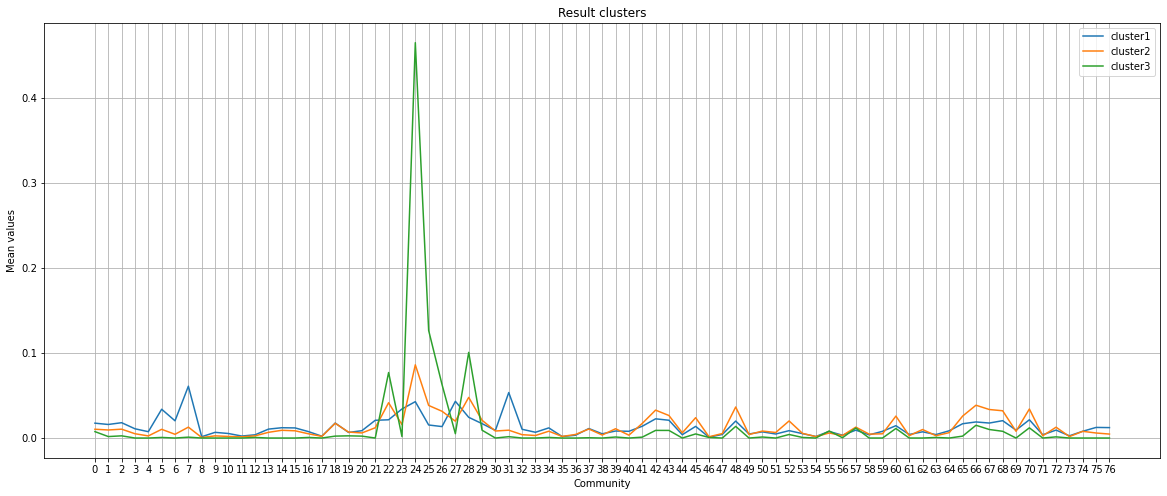

In [ ]:
fig, ax = plt.subplots(figsize=(20,8))
xticks = np.arange(len(df3_D))
ax.plot(df3_D,label=col)
ax.set(xticks=xticks,xticklabels=xticks,xlabel='Community',
       ylabel='Mean values',
       title='Result clusters')
ax.legend()
ax.grid()

From the line graph, we can see the community area_24 is the most abnormal one.

In [ ]:
data4.loc[24]

Community Area Number                                    25
COMMUNITY AREA NAME                                  Austin
centroid_x                                      1140839.462
centroid_y                                      1903174.321
PERCENT OF HOUSING CROWDED                              6.3
PERCENT HOUSEHOLDS BELOW POVERTY                       28.6
PERCENT AGED 16+ UNEMPLOYED                            22.6
PERCENT AGED 25+ WITHOUT HIGH SCHOOL DIPLOMA           24.4
PERCENT AGED UNDER 18 OR OVER 64                       37.9
PER CAPITA INCOME                                     15957
PERCENT OF HOUSING UNITS VACANT                   14.188517
NUM_CRIMES_2016                                       15719
Name: 24, dtype: object

In Austin community, the percent of households below poverty, the percent aged 16+ unemployed, the percent aged 25+ without high school diploma, and the percent aged under 18 or over 64 are all very high, all these cause the high volume of crime numbers, so that make this area a dangerous area.

In [ ]:
data_f = pd.DataFrame([data3['Category'],res.labels_]).T.rename(columns={0:'Category','Unnamed 0':'cluster'})
data_f

,Category,cluster
0,P1P,1
1,P2,1
2,P1V,1
3,P1V,1
4,P1V,1
...,...,...
114,P1P,0
115,P2,1
116,P2,1
117,P2,1


In [ ]:
data3_g = data3.loc[:,'day_Sun': 'day_Sat']
data3_g

,day_Sun,day_Mon,day_Tue,day_Wed,day_Thu,day_Fri,day_Sat
0,0.138810,0.135977,0.155807,0.121813,0.130312,0.147309,0.169972
1,0.151852,0.118519,0.162963,0.122222,0.129630,0.129630,0.185185
2,0.149912,0.139405,0.141506,0.131349,0.136953,0.133100,0.167776
3,0.125000,0.139000,0.148000,0.153000,0.133000,0.142000,0.160000
4,0.156863,0.107843,0.166667,0.117647,0.147059,0.117647,0.186275
...,...,...,...,...,...,...,...
114,0.119700,0.143231,0.140389,0.144367,0.147209,0.153007,0.152097
115,0.180672,0.096639,0.147059,0.092437,0.138655,0.142857,0.201681
116,0.142334,0.133388,0.150468,0.145181,0.125661,0.149654,0.153314
117,0.177122,0.114391,0.132841,0.143911,0.140221,0.121771,0.169742


g) For part g, you will use the same dataset to compare the clusters produced by several different methods.  But this time you should cluster using only the _day-of-week_ (not hour-of-day) attributes (day_Sun..day_Sat).  Please perform four different clusterings using (i) k-means, (ii) Gaussian mixture models, (iii) Bottom-up hierarchical clustering with "single link" distance metric, and (iv) Bottom-up hierarchical clustering with "complete link" distance metric.  In each case, you should choose the number of clusters using the silhouette method (or another established method of your choice- please specify).  For each clustering, report the number of clusters formed and the number of elements in each cluster. You should also identify any notable similarities or differences between the clusterings. (20 pts)

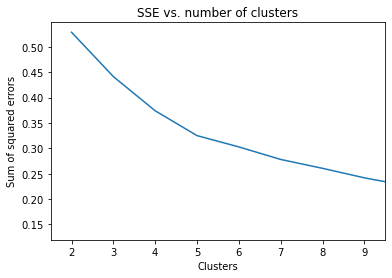

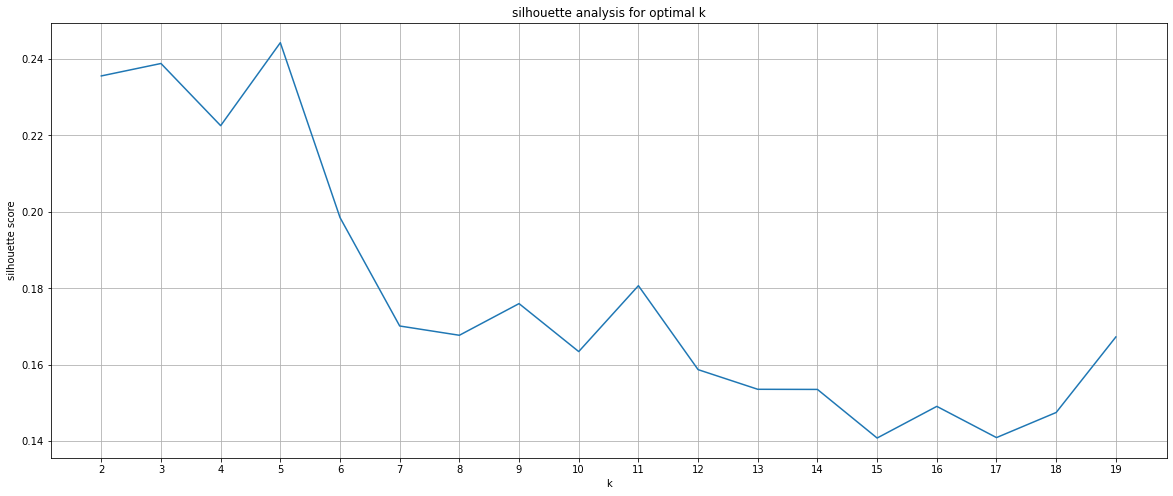

In [ ]:
# i) kmeans
# Look for an elbow in the within-cluster SSE (k-means example):
start = 2
end = 20
SSE = []
silhouette_avg = []
for i in range(start,end):
    km = KMeans(n_clusters = i,random_state=200)
    res=km.fit(data3_g)
    SSE.append(res.inertia_)
    silhouette_avg.append(silhouette_score(data3_g,res.labels_))
#     print("For n_clusters = {} the average silhouette_score is : {}".format(i,silhouette_avg))
# print(SSE)


plt.gca()
plt.plot(range(start,end),SSE)
plt.xlabel("Clusters")
plt.ylabel("Sum of squared errors")
plt.title("SSE vs. number of clusters")
plt.xlim(1.5,9.5)
plt.show()

fig, ax = plt.subplots(figsize=(20,8))
xticks = np.arange(len(silhouette_avg))
ax.plot(xticks,silhouette_avg)
ax.set(xticks=xticks,xticklabels=xticks+2,xlabel='k',
       ylabel='silhouette score',
       title='silhouette analysis for optimal k')
ax.grid()

the average silhouette_score is the highest one when the cluster = 5, so choose cluster = 5.

In [ ]:
km = KMeans(n_clusters=5,random_state=200)
res=km.fit(data3_g)

print('Cluster assignments:',res.labels_)
print('\nCluster centers:\n',res.cluster_centers_)
print('\nSum of squared errors:',res.inertia_)

Cluster assignments: [0 0 0 1 0 0 4 1 0 1 0 0 0 0 0 0 0 0 0 4 0 1 1 1 1 1 0 1 1 0 1 0 1 1 1 0 4
 4 4 0 1 1 1 4 4 0 0 1 1 0 0 0 3 0 0 0 1 1 1 1 1 1 1 1 0 1 1 0 1 1 1 0 1 1
 3 2 1 1 4 1 1 2 1 0 0 1 1 0 4 1 1 1 2 4 1 1 0 1 1 0 1 1 0 0 2 1 1 0 1 1 1
 1 0 1 1 0 0 0 1]

Cluster centers:
 [[0.16407806 0.13474658 0.13169153 0.12980495 0.12991939 0.14406819
  0.16569129]
 [0.12339555 0.15293417 0.15136702 0.14534232 0.14416073 0.1529129
  0.12988731]
 [0.09163827 0.07248302 0.16769196 0.148095   0.22542657 0.16072547
  0.13393972]
 [0.15774753 0.06397551 0.07749736 0.07362139 0.09696529 0.26882928
  0.26136364]
 [0.05514473 0.16294091 0.17931144 0.18607265 0.16381321 0.16803894
  0.08467811]]

Sum of squared errors: 0.32517449208342264


In [ ]:
g_km = pd.DataFrame(res.labels_)
g_km.value_counts()

1    59
0    44
4    10
2     4
3     2
dtype: int64

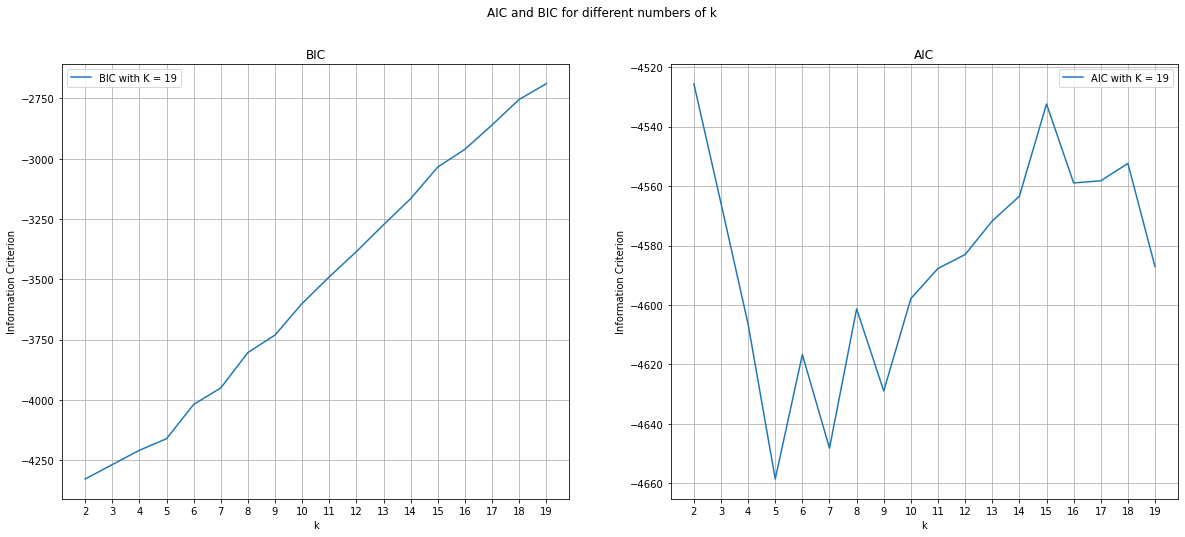

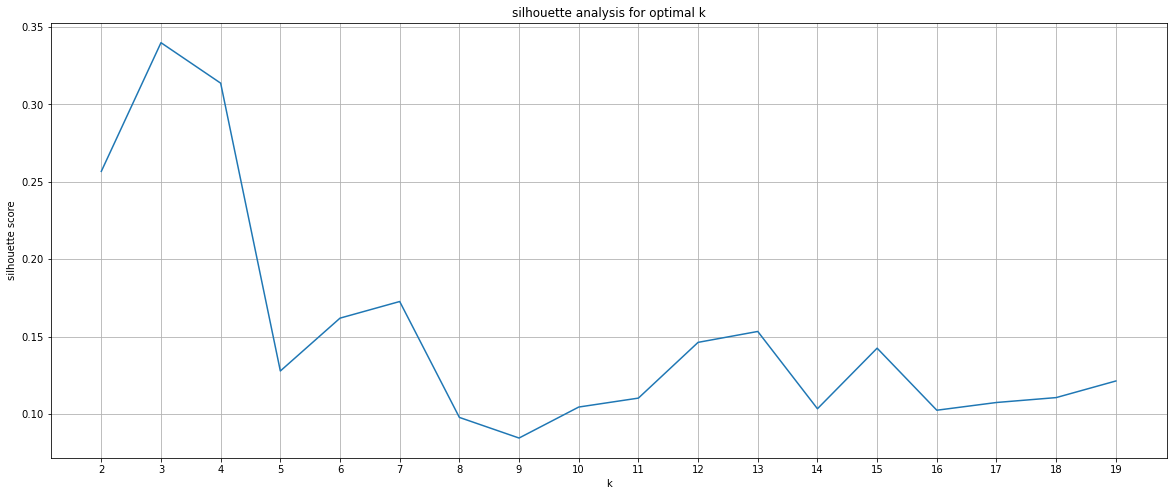

In [ ]:
# Use Gaussian mixture models (EM) package from sklearn
from sklearn.mixture import GaussianMixture
from scipy import linalg
import matplotlib as mpl
GMs = []
Sum_bic = []
Sum_aic = []
silhouette_avg = []
fig, ax = plt.subplots(nrows=1,ncols=2,figsize=(20,8))
ax = ax.flatten()
xticks = np.arange(2,20)

for i in range(start,end):
    GMs.append(GaussianMixture(n_components=i,random_state=69))
    res = GMs[i-2].fit_predict(data3_g)
    Sum_bic.append(GMs[i-2].bic(data3_g))
    Sum_aic.append(GMs[i-2].aic(data3_g))
    silhouette_avg.append(silhouette_score(data3_g,res))
    #     print("For n_clusters = {} the average silhouette_score is : {}".format(i,silhouette_avg))
    
ax[0].plot(xticks,Sum_bic,label=f'BIC with K = {i}')
ax[1].plot(xticks,Sum_aic,label=f'AIC with K = {i}')
    
ax[0].set(xticks=xticks,xticklabels=xticks,xlabel='k',
       ylabel='Information Criterion',
       title='BIC')
ax[1].set(xticks=xticks,xticklabels=xticks,xlabel='k',
       ylabel='Information Criterion',
       title='AIC')

fig.suptitle('AIC and BIC for different numbers of k')
ax[0].legend()
ax[1].legend()
ax[0].grid()
ax[1].grid()
plt.show()

fig, ax = plt.subplots(figsize=(20,8))
xticks = np.arange(len(silhouette_avg))
ax.plot(xticks,silhouette_avg)
ax.set(xticks=xticks,xticklabels=xticks+2,xlabel='k',
       ylabel='silhouette score',
       title='silhouette analysis for optimal k')
ax.grid()

from BIC analysis the optimal is 2,

from AIC analysis the optimal is 5

sihouette analysis optimal k is 3 but depending on the choice of random state

In [ ]:
gmm = GaussianMixture(n_components=3,random_state=69)
res = gmm.fit_predict(data3_g)
pd.DataFrame(res).value_counts()

1    96
2    14
0     9
dtype: int64

In [ ]:
from scipy.cluster.hierarchy import dendrogram, linkage,fcluster  # for hierarchical clustering

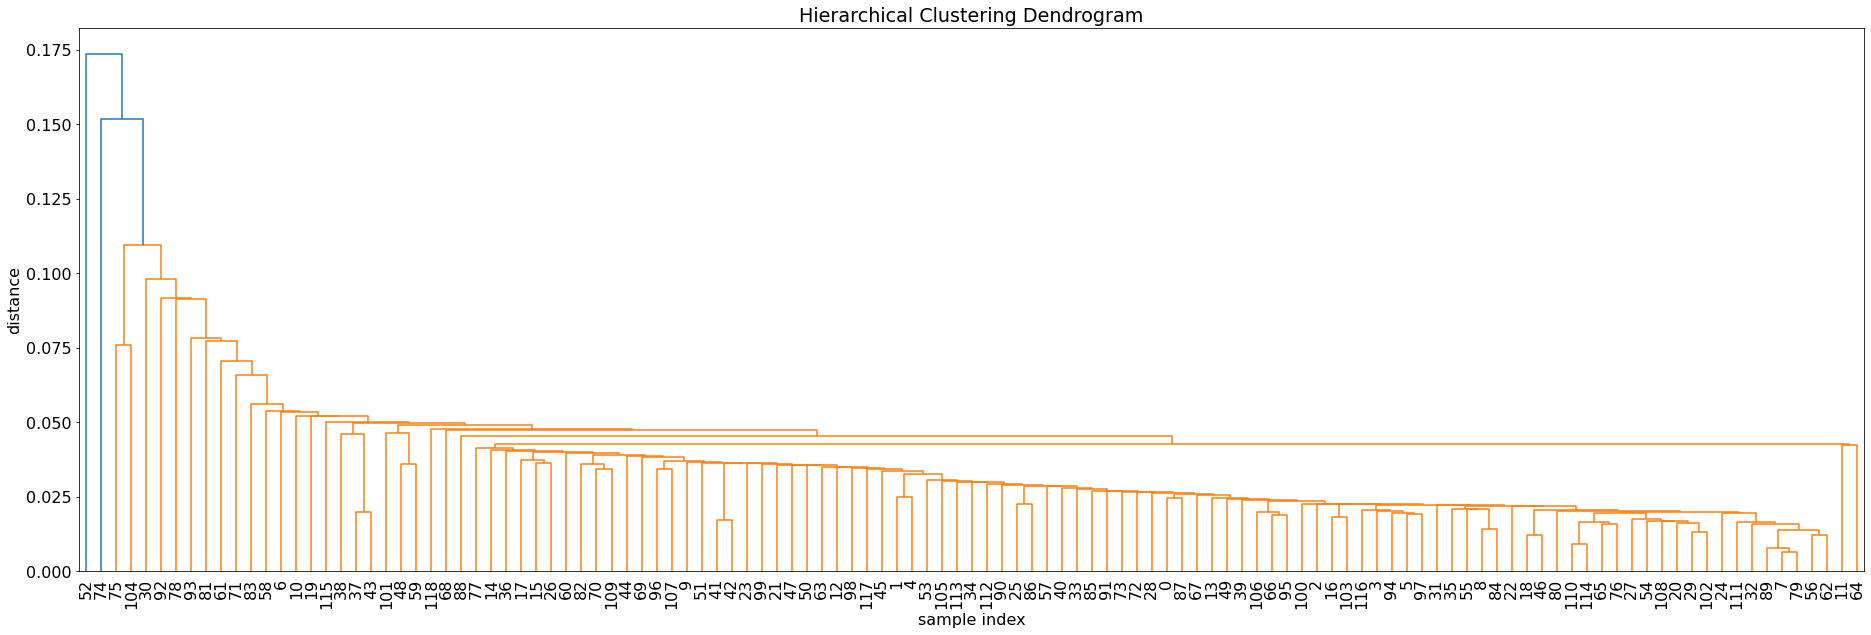

In [ ]:
Z_single = linkage(data3_g, 'single')
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(figsize=(32,10))
dendrogram(Z_single,leaf_rotation=90.,ax=ax,leaf_font_size=16)
ax.set(xlabel='sample index',ylabel='distance',title='Hierarchical Clustering Dendrogram')
plt.show()

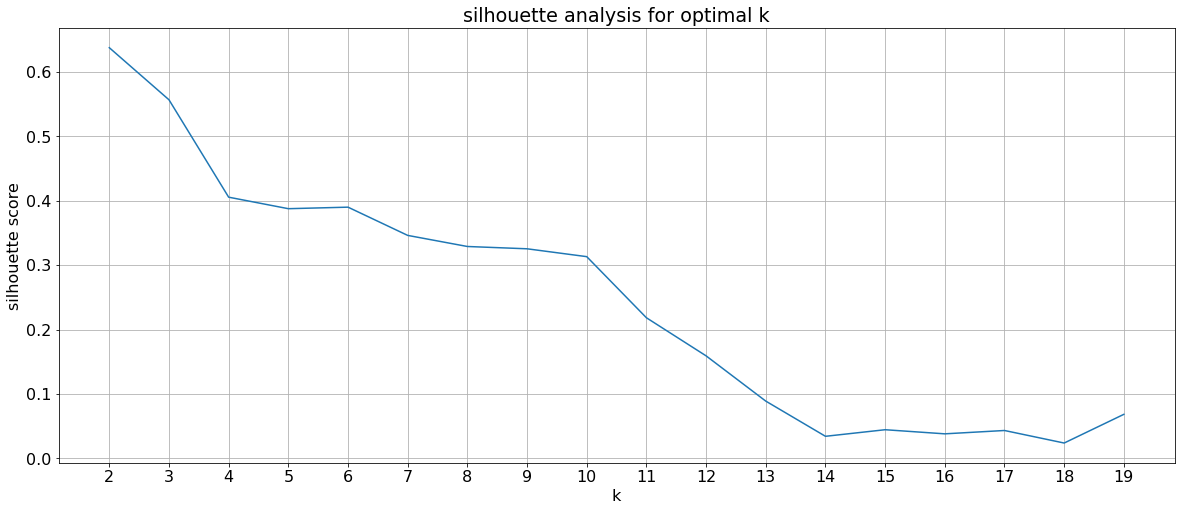

In [ ]:
range_n_clusters = range(start,end)
silhouette_avg = []
single = []
for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z_single, n_clusters, criterion='maxclust') 
    single.append(cluster_labels)
#     silhouette_avg = silhouette_score(data3_g, cluster_labels)
    silhouette_avg.append(silhouette_score(data3_g,cluster_labels))
#     print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

fig, ax = plt.subplots(figsize=(20,8))
xticks = np.arange(len(silhouette_avg))
ax.plot(xticks,silhouette_avg)
ax.set(xticks=xticks,xticklabels=xticks+2,xlabel='k',
       ylabel='silhouette score',
       title='silhouette analysis for optimal k')
ax.grid()

The average silhouette_score is the highest when the cluster = 2, so choose cluster = 2.

In [ ]:
pd.DataFrame(single[0]).value_counts()

1    118
2      1
dtype: int64

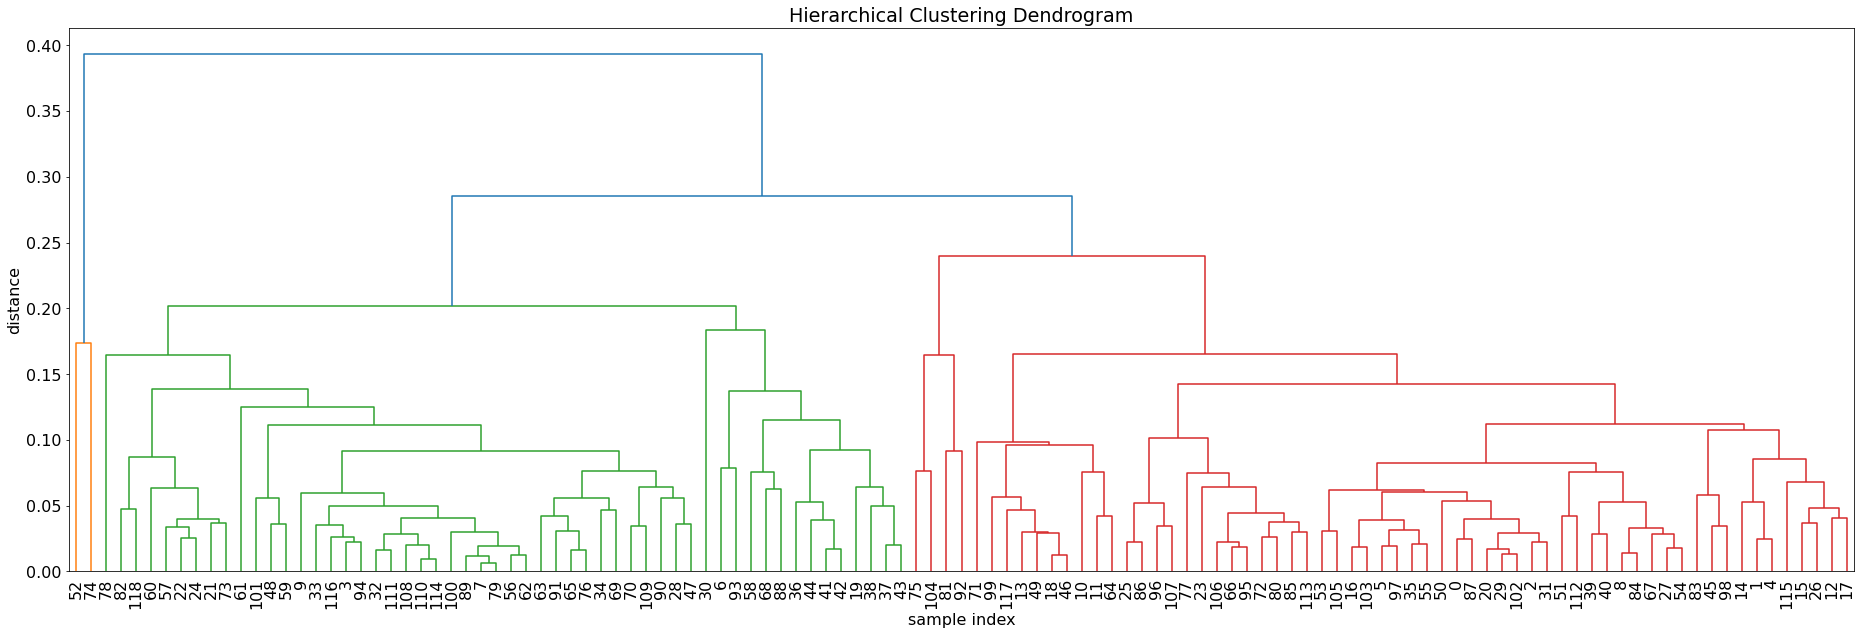

In [ ]:
Z_complete = linkage(data3_g, 'complete')
plt.rcParams.update({'font.size':16})
fig, ax = plt.subplots(figsize=(32,10))
dendrogram(Z_complete,leaf_rotation=90.,ax=ax,leaf_font_size=16)
ax.set(xlabel='sample index',ylabel='distance',title='Hierarchical Clustering Dendrogram')
plt.show()

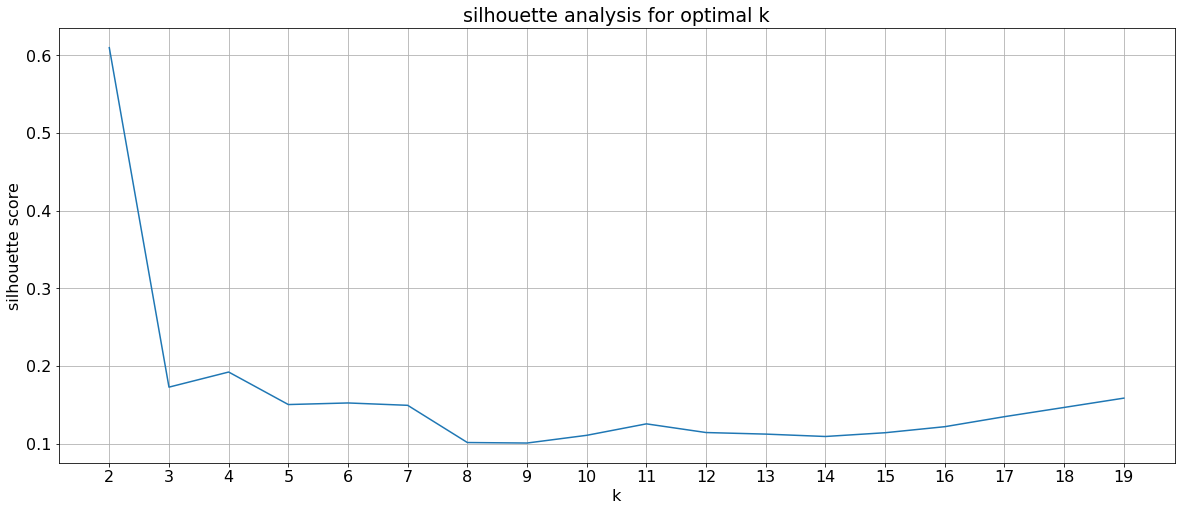

In [ ]:
range_n_clusters = range(start,end)
silhouette_avg = []
complete = []
for n_clusters in range_n_clusters:
    cluster_labels=fcluster(Z_complete, n_clusters, criterion='maxclust')
    complete.append(cluster_labels)
#     silhouette_avg = silhouette_score(data3_g, cluster_labels)
#     print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))
    silhouette_avg.append(silhouette_score(data3_g,cluster_labels))
#     print("For n_clusters = {},".format(n_clusters)+" the average silhouette_score is : {}".format(silhouette_avg))

fig, ax = plt.subplots(figsize=(20,8))
xticks = np.arange(len(silhouette_avg))
ax.plot(xticks,silhouette_avg)
ax.set(xticks=xticks,xticklabels=xticks+2,xlabel='k',
       ylabel='silhouette score',
       title='silhouette analysis for optimal k')
ax.grid()

from silhouette the highest score is 2, but combining elbow method is 3.

In [ ]:
pd.DataFrame(complete[1]).value_counts()

3    63
2    54
1     2
dtype: int64

Based on these methods, kmeans is the best method and the fastest algorithm for clustering.